In [12]:
!pip install networkx==2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-2.5-py3-none-any.whl (1.6 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.4
    Uninstalling networkx-2.4:
      Successfully uninstalled networkx-2.4


In [9]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import networkx as nx
#%matplotlib notebook
import matplotlib.pyplot as plt
import os
import operator
import warnings
warnings.filterwarnings('ignore')

In [2]:
G_df = pd.read_csv('drive/MyDrive/NetworkX/Data/routes.csv')
cols_list=["City","Country","IATA"]
airport_df = pd.read_csv('drive/MyDrive/NetworkX/Data/airports.csv',usecols=cols_list)

In [3]:
airport_df_full = pd.read_csv('drive/MyDrive/NetworkX/Data/airports.csv')

In [4]:
G_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 67663 non-null  object
 1   Airline ID              67663 non-null  object
 2   Source airport          67663 non-null  object
 3   Source airport ID       67663 non-null  object
 4   Destination airport     67663 non-null  object
 5   Destination airport ID  67663 non-null  object
 6   Codeshare               14597 non-null  object
 7   Stops                   67663 non-null  int64 
 8   Equipment               67645 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [5]:
G_df.head(2)

Airline Airline ID Source airport Source airport ID Destination airport  \
0      2B        410            AER              2965                 KZN   
1      2B        410            ASF              2966                 KZN   

  Destination airport ID Codeshare  Stops Equipment  
0                   2990       NaN      0       CR2  
1                   2990       NaN      0       CR2

In [9]:
G_df.shape

(67663, 9)

In [10]:
airport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City     7649 non-null   object
 1   Country  7698 non-null   object
 2   IATA     7698 non-null   object
dtypes: object(3)
memory usage: 180.5+ KB


In [11]:
airport_df.head(2)

City           Country IATA
0  Goroka  Papua New Guinea  GKA
1  Madang  Papua New Guinea  MAG

In [ ]:
G_draw = nx.from_pandas_edgelist(G_df.head(1000), 'Source airport', 'Destination airport',create_using=nx.DiGraph())

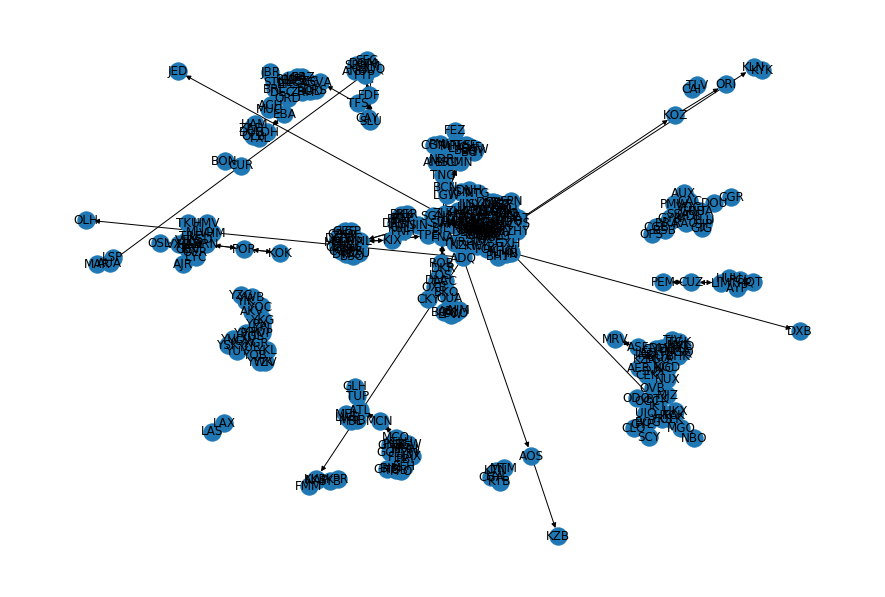

In [ ]:
plt.figure(figsize=(12,8))
nx.draw(G_draw,pos=nx.spring_layout(G_draw),with_labels=True)

In [6]:
G = nx.from_pandas_edgelist(G_df, 'Source airport', 'Destination airport',create_using=nx.DiGraph())

In [14]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 3425
Number of edges: 37595
Average in degree:  10.9766
Average out degree:  10.9766


In [ ]:
G.nodes

NodeView(('AER', 'KZN', 'ASF', 'MRV', 'CEK', 'OVB', 'DME', 'NBC', 'TGK', 'UUA', 'EGO', 'KGD', 'GYD', 'LED', 'SVX', 'NJC', 'NUX', 'BTK', 'IKT', 'HTA', 'KCK', 'ODO', 'UKX', 'ULK', 'YKS', 'MJZ', 'AYP', 'LIM', 'CUZ', 'PEM', 'HUU', 'IQT', 'PCL', 'TPP', 'ABJ', 'BOY', 'OUA', 'ACC', 'BKO', 'DKR', 'COO', 'LFW', 'NIM', 'BOG', 'GYE', 'UIO', 'CLO', 'SCY', 'OCC', 'BDS', 'ZRH', 'BOD', 'BRS', 'GVA', 'LPA', 'LCA', 'RMF', 'TFS', 'AJR', 'LYC', 'ARN', 'GEV', 'HAD', 'JKG', 'KRF', 'KSD', 'MHQ', 'OER', 'POR', 'TRF', 'VBY', 'VHM', 'VXO', 'HMV', 'KOK', 'TKU', 'OSL', 'ADQ', 'AOS', 'KKB', 'KLN', 'KOZ', 'OLH', 'KZB', 'SYB', 'KYK', 'ORI', 'KPR', 'BSO', 'MNL', 'BXU', 'CBO', 'CGY', 'CRM', 'DGT', 'DWC', 'GES', 'KLO', 'LGP', 'MPH', 'OZC', 'PPS', 'RXS', 'SUG', 'TUG', 'ZAM', 'AUX', 'PMW', 'BRA', 'BSB', 'SSA', 'OPS', 'RAO', 'CAC', 'GRU', 'CGB', 'GYN', 'CGR', 'DOU', 'GIG', 'UBA', 'UDI', 'VDC', 'PLU', 'SJP', 'BRL', 'ORD', 'STL', 'DEC', 'JBR', 'CGA', 'HYL', 'KTN', 'KTB', 'MTM', 'LOS', 'ROB', 'BCN', 'BJL', 'FNA', 'CKY', 'OX

In [ ]:
G.edges

OutEdgeView([('AER', 'KZN'), ('AER', 'DYU'), ('AER', 'KIV'), ('AER', 'MSQ'), ('AER', 'TAS'), ('AER', 'TZX'), ('AER', 'EVN'), ('AER', 'KRR'), ('AER', 'DME'), ('AER', 'IST'), ('AER', 'LED'), ('AER', 'OMS'), ('AER', 'SVO'), ('AER', 'SVX'), ('AER', 'LBD'), ('AER', 'VKO'), ('AER', 'KJA'), ('KZN', 'AER'), ('KZN', 'ASF'), ('KZN', 'CEK'), ('KZN', 'DME'), ('KZN', 'EGO'), ('KZN', 'LED'), ('KZN', 'SVX'), ('KZN', 'AYT'), ('KZN', 'DWC'), ('KZN', 'SHJ'), ('KZN', 'FEG'), ('KZN', 'SKD'), ('KZN', 'TAS'), ('KZN', 'ALA'), ('KZN', 'SVO'), ('KZN', 'DYU'), ('KZN', 'LBD'), ('KZN', 'IST'), ('KZN', 'UFA'), ('KZN', 'FRU'), ('KZN', 'OSS'), ('ASF', 'KZN'), ('ASF', 'MRV'), ('ASF', 'DME'), ('ASF', 'LED'), ('ASF', 'SCO'), ('ASF', 'SVO'), ('ASF', 'SAW'), ('MRV', 'ASF'), ('MRV', 'RTW'), ('MRV', 'SAW'), ('MRV', 'SCO'), ('MRV', 'DXB'), ('MRV', 'TAS'), ('MRV', 'GYD'), ('MRV', 'TLV'), ('MRV', 'DME'), ('MRV', 'EVN'), ('MRV', 'LED'), ('MRV', 'SVO'), ('MRV', 'SVX'), ('MRV', 'DWC'), ('MRV', 'DYU'), ('MRV', 'VKO'), ('CEK', 'KZ

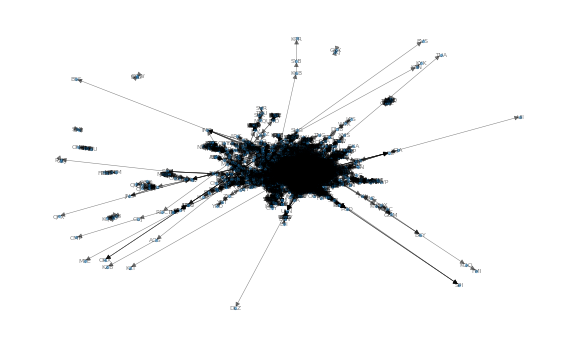

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
nx.draw_networkx(G, ax=ax, node_size=5,
                 font_size=6, alpha=.5,
                 width=.5)
ax.set_axis_off()

In [7]:
available_IATA=list(airport_df["IATA"])
nodes_in_G=list(G.nodes())

In [8]:
import numpy as np
import plotly.graph_objects as go
import random
import seaborn as sns

In [9]:
dict_pos={}
c=0
for i in nodes_in_G:
    x=np.array(airport_df_full.loc[airport_df['IATA'].isin([i])][["Latitude","Longitude"]])
    if len(x)==0:
        G.remove_node(i)
        c=c+1
        continue
    else:
        dict_pos[i]=x[0]
print(c)

163


In [10]:
nx.set_node_attributes(G, dict_pos, 'pos')

In [11]:
edge_x = []
edge_y = []
for edge in G.edges():
    y0, x0 = G.nodes[edge[0]]['pos']
    y1, x1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.25, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    y, x = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=7.5,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [12]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph of airport routes',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=10,l=5,r=5,t=10),
                annotations=[ dict(
                    text="",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

#### Which Country has the most Airports?

In [13]:
# Count the number of airports in each country
counts = airport_df_full.groupby('Country').size().reset_index(name='Counts')

In [14]:
# Sort the countries by the number of airports
counts = counts.sort_values(by='Counts', ascending=False)

In [15]:
# Get the top 20 countries
top_20_countries = counts[:20]
top_20_countries

Country  Counts
223   United States    1512
37           Canada     430
11        Australia     334
176          Russia     264
27           Brazil     264
79          Germany     249
43            China     241
73           France     217
222  United Kingdom     167
97            India     148
98        Indonesia     145
106           Japan     123
195    South Africa      99
8         Argentina      96
136          Mexico      84
104           Italy      83
99             Iran      82
204          Sweden      77
215          Turkey      76
46         Colombia      75

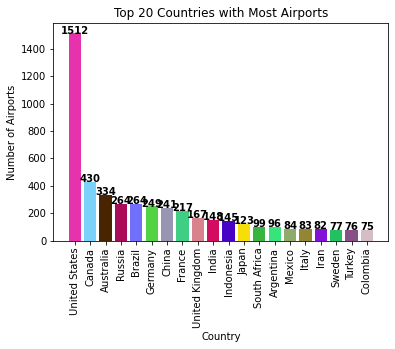

In [16]:
# Plot a bar graph of the top 20 countries

# Generate random colors for each bar
colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for i in range(20)]

plt.bar(top_20_countries['Country'], top_20_countries['Counts'], color=colors)
plt.xlabel('Country')
plt.ylabel('Number of Airports')
plt.title('Top 20 Countries with Most Airports')
plt.xticks(rotation=90)
# Display the count values inside the bars
for i, v in enumerate(top_20_countries['Counts']):
    plt.text(i, v + 0.2, str(v), ha='center', fontweight='bold')
plt.show()

### Example of Graph Capabilities on given data

In [17]:
# Is there any Direct flight from one airport to other airport
"RCM" in list(nx.neighbors(G, "WIN"))

False

In [18]:
#'TZL', 'MMX'
print("TZL" in list(nx.neighbors(G, "MMX")))
#print(nx.shortest_path(G, "TZL", "MMX"))
#print(nx.shortest_path_length(G, "TZL", "MMX"))

True


In [19]:
# Find the shortest way to one airport to other airport
shortest_path = nx.shortest_path(G, "RCM", "WIN")
shortest_path

['RCM', 'JCK', 'ISA', 'TSV', 'WIN']

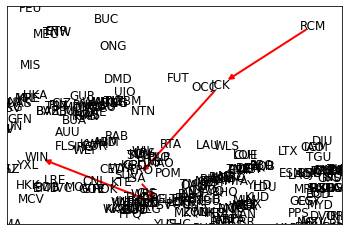

In [20]:
pos = nx.spring_layout(G)
# Plot only the shortest path
nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)], edge_color='red', width=2)

# Include node labels
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=12)

# Display the plot
plt.show()

In [21]:
# Find the length of the given airports
nx.shortest_path_length(G, "RCM", "WIN")

4

In [22]:
#print(list(nx.all_shortest_paths(G,"RCM", "WIN")))

## Weakly and strongly connected components

In [23]:
#Check the nodes are in the largest (in terms of nodes) weakly connected component
wccs = nx.weakly_connected_components(G)
x=len(max(wccs, key=len))
print(x)
print(x/len(G.nodes()))

3231
0.9904966278356836


In [24]:
#Check the How many nodes are in the largest (in terms of nodes) strongly connected component
sccs = nx.strongly_connected_components(G)
x=len(max(sccs, key=len))
print(x)
print(x/len(G.nodes())) 

3190
0.9779276517473943


### Average shortest path length

In [28]:
# get a list of strongly connected components and then get subgraphs of each component
sccs = nx.strongly_connected_components(G)
scc_subs = [G.subgraph(c) for c in sccs]

# get the largest strongly connected subgraph
if scc_subs:
    G_sc = max(scc_subs, key=len)
    shortest_sc = nx.algorithms.average_shortest_path_length(G_sc)
else:
    shortest_sc = float('inf')

print(shortest_sc)

3.978405490660981


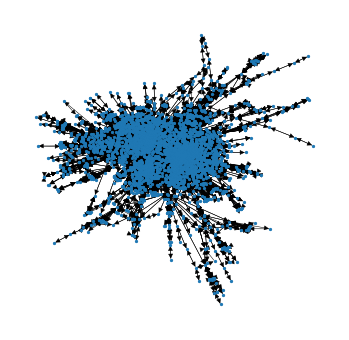

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(G_sc, ax=ax, with_labels=False,
                 node_size=5, width=.5)
ax.set_axis_off()

In [30]:
# get a list of weakly connected components and then get subgraphs of each component
wccs = nx.weakly_connected_components(G)
wcc_subs = [G.subgraph(c) for c in wccs]

# get the largest weakly connected subgraph
if wcc_subs:
    G_wc = max(wcc_subs, key=len)
    shortest_wc = nx.algorithms.average_shortest_path_length(G_wc)
else:
    shortest_wc = float('inf')

print(shortest_wc)

3.9448876163865343


In [31]:
len(G_sc.edges())/len(G_sc.nodes()) 

11.58307210031348

In [33]:
len(G_wc.edges())/len(G_wc.nodes())

11.450324976787373

## Density of a network

In [35]:
nx.density(G)

0.0034822477936770533

## Degrees

In [36]:
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
#print(degree_values)
degrees

{'AER': 35,
 'KZN': 42,
 'ASF': 14,
 'MRV': 32,
 'CEK': 28,
 'OVB': 105,
 'DME': 376,
 'NBC': 14,
 'TGK': 2,
 'UUA': 6,
 'EGO': 18,
 'KGD': 20,
 'GYD': 78,
 'LED': 222,
 'SVX': 131,
 'NJC': 18,
 'NUX': 20,
 'BTK': 8,
 'IKT': 56,
 'HTA': 18,
 'KCK': 2,
 'ODO': 2,
 'UKX': 2,
 'ULK': 4,
 'YKS': 46,
 'MJZ': 12,
 'AYP': 2,
 'LIM': 114,
 'CUZ': 10,
 'PEM': 4,
 'HUU': 2,
 'IQT': 8,
 'PCL': 6,
 'TPP': 6,
 'ABJ': 41,
 'BOY': 4,
 'OUA': 29,
 'ACC': 58,
 'BKO': 32,
 'DKR': 62,
 'COO': 37,
 'LFW': 28,
 'NIM': 17,
 'BOG': 148,
 'GYE': 37,
 'UIO': 45,
 'CLO': 36,
 'SCY': 2,
 'OCC': 4,
 'BDS': 38,
 'ZRH': 273,
 'BOD': 98,
 'BRS': 145,
 'GVA': 201,
 'LPA': 161,
 'LCA': 108,
 'RMF': 8,
 'TFS': 166,
 'AJR': 2,
 'LYC': 4,
 'ARN': 246,
 'GEV': 8,
 'HAD': 7,
 'JKG': 4,
 'KRF': 4,
 'KSD': 4,
 'MHQ': 6,
 'OER': 2,
 'POR': 6,
 'TRF': 60,
 'VBY': 8,
 'VHM': 4,
 'VXO': 11,
 'HMV': 2,
 'KOK': 4,
 'TKU': 14,
 'OSL': 206,
 'ADQ': 5,
 'KLN': 2,
 'KYK': 1,
 'BSO': 2,
 'MNL': 156,
 'BXU': 4,
 'CBO': 2,
 'CGY': 10,
 '

In [37]:
# Calculate the in-degree and out-degree for each node
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

In [38]:
# Combine the in-degree and out-degree into a single dataframe
degree_df = pd.DataFrame({'node': list(in_degree.keys()), 
                         'in_degree': list(in_degree.values()), 
                         'out_degree': list(out_degree.values())})
degree_df['Total Degree'] = degree_df['in_degree'] + degree_df['out_degree']

# Show the first few rows of the dataframe
print(degree_df)



     node  in_degree  out_degree  Total Degree
0     AER         18          17            35
1     KZN         21          21            42
2     ASF          7           7            14
3     MRV         16          16            32
4     CEK         14          14            28
...   ...        ...         ...           ...
3257  WIN          2           2             4
3258  LSY          1           1             2
3259  MIM          3           3             6
3260  MYA          2           2             4
3261  OAG          1           1             2

[3262 rows x 4 columns]


In [39]:
sorted_data = degree_df.sort_values(by='Total Degree', ascending=False)

print("Top 5 highest total degrees:")
for i in range(5):
    print(f"Node: {sorted_data.iloc[i]['node']}, Total Degree: {sorted_data.iloc[i]['Total Degree']}")

print("\nTop 5 lowest total degrees:")
for i in range(5):
    print(f"Node: {sorted_data.iloc[len(node) - 1 - i]['node']}, Total Degree: {sorted_data.iloc[len(node) - 1 - i]['Total Degree']}")

Top 5 highest total degrees:
Node: FRA, Total Degree: 477
Node: CDG, Total Degree: 470
Node: AMS, Total Degree: 463
Node: IST, Total Degree: 455
Node: ATL, Total Degree: 433

Top 5 lowest total degrees:
Node: AMS, Total Degree: 463
Node: CDG, Total Degree: 470
Node: FRA, Total Degree: 477
Node: AKI, Total Degree: 0
Node: LPS, Total Degree: 0


In [40]:
#degree_df.to_csv('degrees.csv', index=False)

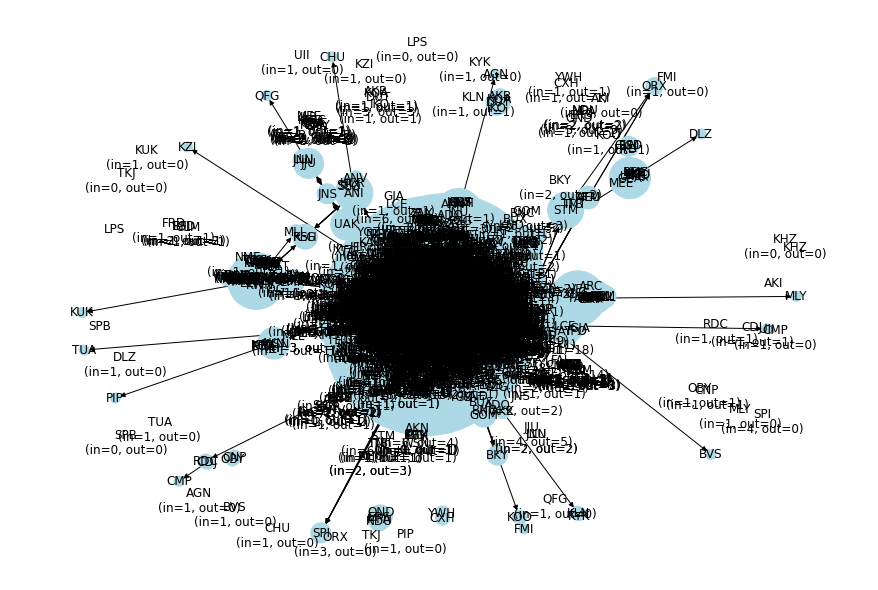

In [41]:

# Visualize the in-degree and out-degree using a bar plot
#plt.bar(in_degree.keys(), in_degree.values(), label='In-degree')
#plt.bar(out_degree.keys(), out_degree.values(), label='Out-degree')

# Add a legend and title
#plt.legend()
#plt.title("In-degree and Out-degree of Nodes")

# Set up the plot
plt.figure(figsize=(12, 8))

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=[v * 100 for v in degrees.values()])

# Add labels for the degrees
labels = {node: f'{node}\n(in={G.in_degree(node)}, out={G.out_degree(node)})' for node in G.nodes()}
nx.draw_networkx_labels(G, pos=nx.spring_layout(G), labels=labels, font_size=12)

# Show the plot
plt.show()

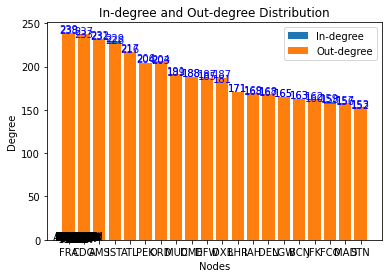

In [42]:
sorted_in_degree = dict(sorted(in_degree.items(), key=lambda item: item[1], reverse=True)[:20])
sorted_out_degree = dict(sorted(out_degree.items(), key=lambda item: item[1], reverse=True)[:20])

# Plot the in-degree distribution
plt.bar(sorted_in_degree.keys(), sorted_in_degree.values(), label='In-degree')

# Plot the out-degree distribution
plt.bar(sorted_out_degree.keys(), sorted_out_degree.values(), label='Out-degree')

# Add the node labels to the plot
for node, pos in nx.spring_layout(G).items():
    plt.annotate(node, pos)

for i, v in enumerate(sorted_in_degree.values()):
  plt.text(i, v + 0.5, str(v), color='blue', ha='center')

for i, v in enumerate(sorted_out_degree.values()):
  plt.text(i, v + 0.5, str(v), color='blue', ha='center')
  
# Add the plot labels and title
plt.xlabel('Nodes')
plt.ylabel('Degree')
plt.title('In-degree and Out-degree Distribution')
plt.legend()

# Show the plot
plt.show()


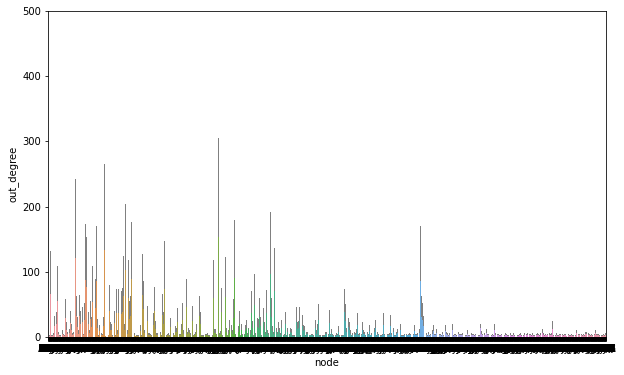

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='node', y='Total Degree', data=degree_df, color='gray')
sns.barplot(x='node', y='in_degree', data=degree_df)
sns.barplot(x='node', y='out_degree', data=degree_df)

plt.show()

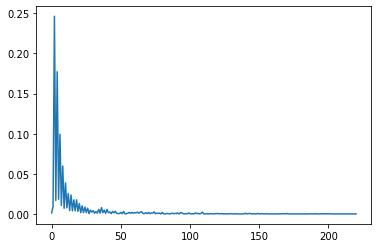

In [44]:
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G_sc)) for i in degree_values]
plt.plot(histogram)

## Diameter and radius



In [45]:
# The diameter represents the greatest possible no of airports between any two airports
diameter=nx.diameter(G_sc)
diameter

13

In [46]:
#The radius represents an airport from which every other airport is at a minimum no of airports apar
radius=nx.radius(G_sc)
radius

7

## Periphery and Center. Now lets see which airports are these


In [47]:
# Set of nodes which have eccentricity equal to diameter
per=nx.periphery(G_sc)
per

['YPO']

In [48]:
#Set of nodes eccentricity equal to the radius
airport_df.loc[airport_df['IATA'].isin(per)]

City Country IATA
4228  Peawanuck  Canada  YPO

In [49]:
cen=nx.center(G_sc)
cen

['LIM',
 'BOG',
 'ZRH',
 'GRU',
 'ORD',
 'BCN',
 'LGW',
 'YUL',
 'YQB',
 'DXB',
 'JED',
 'HKG',
 'TPE',
 'MUC',
 'ATL',
 'AMS',
 'BRU',
 'SXM',
 'PEK',
 'PVG',
 'ICN',
 'LAX',
 'CAI',
 'TLV',
 'VKO',
 'DFW',
 'JFK',
 'MIA',
 'PUJ',
 'MEX',
 'CUN',
 'HAV',
 'ISB',
 'ATH',
 'CDG',
 'DUB',
 'FCO',
 'LHR',
 'LIS',
 'MAN',
 'VCE',
 'VIE',
 'WAW',
 'FRA',
 'NRT',
 'SVO',
 'SCL',
 'CPH',
 'CLT',
 'IST',
 'CVG',
 'MSP',
 'DTW',
 'BOS',
 'PTY',
 'AUH',
 'EWR',
 'YYZ',
 'PHL',
 'OPO',
 'IAD',
 'LHE',
 'PIT',
 'SEA',
 'IAH',
 'SFO',
 'GLA',
 'POP',
 'KEF',
 'KHI']

In [50]:
airport_df.loc[airport_df['IATA'].isin(cen)]

City        Country IATA
15     Keflavik        Iceland  KEF
110      Quebec         Canada  YQB
144    Montreal         Canada  YUL
191     Toronto         Canada  YYZ
299    Brussels        Belgium  BRU
...         ...            ...  ...
3676  Charlotte  United States  CLT
3725      Seoul    South Korea  ICN
3735     Athens         Greece  ATH
7629   Istanbul         Turkey  IST
7654  Islamabad       Pakistan  ISB

[70 rows x 3 columns]

### Which node in G_sc is connected to the most other nodes by a shortest path of length equal to the 


In [51]:
# diameter of G_sc
# radius of G_sc How many nodes are connected to this node

In [52]:
max_count = -1
result_node = None
for node in per:
    count = 0
    sp = nx.shortest_path_length(G_sc, node)
    for key, value in sp.items():
        if value == diameter:
            count += 1        
    if count > max_count:
        result_node = node
        max_count = count

result_node, max_count

('YPO', 1)

In [53]:
airport_df.loc[airport_df['IATA'] == result_node]

City Country IATA
4228  Peawanuck  Canada  YPO

In [54]:
d = radius
max_count = -1
result_node = None
for node in cen:
    count = 0
    sp = nx.shortest_path_length(G_sc, node)
    for key, value in sp.items():
        if value == radius:
            count += 1        
    if count > max_count:
        result_node = node
        max_count = count

result_node, max_count

('SXM', 6)

In [55]:
airport_df.loc[airport_df['IATA'] == result_node]

City               Country IATA
2753  Philipsburg  Netherlands Antilles  SXM

### How many and which nodes need to be removed to disconnect result_node?

In [56]:
node = result_node
list(nx.minimum_node_cut(G_sc, cen[0], node)),len(nx.minimum_node_cut(G_sc, cen[0], node))

(['ORD',
  'MIA',
  'YYZ',
  'CDG',
  'DOM',
  'CLT',
  'ORY',
  'PTP',
  'JFK',
  'AMS',
  'BGI',
  'FLL',
  'IAD',
  'PHL',
  'ATL',
  'PTY',
  'SJU',
  'PAP',
  'BOS',
  'CUR',
  'ANU',
  'EWR',
  'SDQ',
  'KIN'],
 24)

## Transitivity and Average Clustering Coefficient of

* Strongly connected

In [57]:
nx.transitivity(G_sc), nx.average_clustering(G_sc)

(0.24939066948102215, 0.48266164402752065)

* Weakly connected

In [58]:
nx.transitivity(G_wc), nx.average_clustering(G_wc)

(0.24924792259225315, 0.47610244131096474)

## Indegree and Outdegree
### What are the top and bottom 5 airports with most incoming flights?

In [59]:
in_deg=nx.in_degree_centrality(G_sc)

* Top 5

In [60]:
top5=sorted(in_deg.items(), key=operator.itemgetter(1),reverse=True)[:5]
l=[]
for i,j in top5:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City        Country IATA
336   Frankfurt        Germany  FRA
574   Amsterdam    Netherlands  AMS
1346      Paris         France  CDG
3482    Atlanta  United States  ATL
7629   Istanbul         Turkey  IST

* Bottom 5

In [61]:
bot5=sorted(in_deg.items(), key=operator.itemgetter(1))[:5]
l=[]
for i,j in bot5:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City Country IATA
2648  Ayacucho    Peru  AYP
5246   Kirensk  Russia  KCK
5247   Ust-Kut  Russia  UKX
5254  Taganrog  Russia  TGK
6404   Bodaibo  Russia  ODO

### What are the top and bottom 5 airports with most outgoing flights?

In [62]:
out_deg=nx.out_degree_centrality(G_sc)

* Top 5

In [63]:
top5=sorted(out_deg.items(), key=operator.itemgetter(1),reverse=True)[:5]
top5

[('FRA', 0.07494512386328002),
 ('CDG', 0.07431796801505174),
 ('AMS', 0.07275007839448103),
 ('IST', 0.07086861084979618),
 ('ATL', 0.06804640953276889)]

In [64]:
l=[]
for i,j in top5:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City        Country IATA
336   Frankfurt        Germany  FRA
574   Amsterdam    Netherlands  AMS
1346      Paris         France  CDG
3482    Atlanta  United States  ATL
7629   Istanbul         Turkey  IST

* Bottom 5

In [65]:
bot5=sorted(out_deg.items(), key=operator.itemgetter(1))[:5]
bot5

[('TGK', 0.00031357792411414236),
 ('KCK', 0.00031357792411414236),
 ('ODO', 0.00031357792411414236),
 ('UKX', 0.00031357792411414236),
 ('AYP', 0.00031357792411414236)]

In [66]:
l=[]
for i,j in bot5:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City Country IATA
2648  Ayacucho    Peru  AYP
5246   Kirensk  Russia  KCK
5247   Ust-Kut  Russia  UKX
5254  Taganrog  Russia  TGK
6404   Bodaibo  Russia  ODO

## Closeness Centrality
### Which airports will allow you to reach all other airports with the lowest average number of airports in between?

In [67]:
closeness = nx.closeness_centrality(G_sc, wf_improved=True)

In [68]:
close=sorted(closeness.items(), key=operator.itemgetter(1),reverse=True)[:5]
l=[]
for i,j in close:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City               Country IATA
336   Frankfurt               Germany  FRA
502      London        United Kingdom  LHR
574   Amsterdam           Netherlands  AMS
1346      Paris                France  CDG
2100      Dubai  United Arab Emirates  DXB

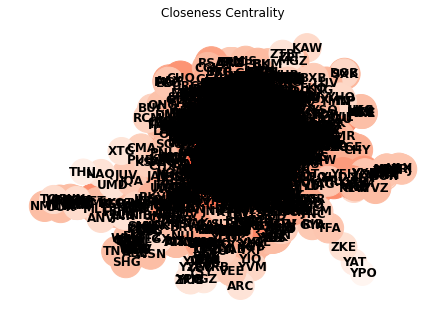

In [69]:
# Plot closeness centrality
nx.draw(G_sc, node_color=list(closeness.values()), cmap=plt.cm.Reds,
        node_size=[v * 5000 for v in closeness.values()],
        with_labels=True, font_weight='bold')
plt.title("Closeness Centrality")
plt.show()

### Which airports will make you reach all other airports with the highest average number of airports in between?

In [70]:
close=sorted(closeness.items(), key=operator.itemgetter(1))[:10]
l=[]
for i,j in close:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City           Country IATA
9            Thule         Greenland  THU
143    Tuktoyaktuk            Canada  YUB
1009         Isiro  Congo (Kinshasa)  IRP
1010         Bunia  Congo (Kinshasa)  BUX
4000      Paulatuk            Canada  YPC
4188  Attawapiskat            Canada  YAT
4204   Grise Fiord            Canada  YGZ
4228     Peawanuck            Canada  YPO
4241       Salluit            Canada  YZG
4872    Birdsville         Australia  BVI

## Betweenness Centrality
### Which airports often act as bridges between other pairs of airports?

In [71]:
# #Finding the best connecting airports
betweeness = nx.betweenness_centrality(G_sc, normalized=True)

In [72]:
close=sorted(betweeness.items(), key=operator.itemgetter(1),reverse=True)[:5]
l=[]
for i,j in close:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City               Country IATA
336     Frankfurt               Germany  FRA
1346        Paris                France  CDG
2100        Dubai  United Arab Emirates  DXB
3285  Los Angeles         United States  LAX
3574    Anchorage         United States  ANC

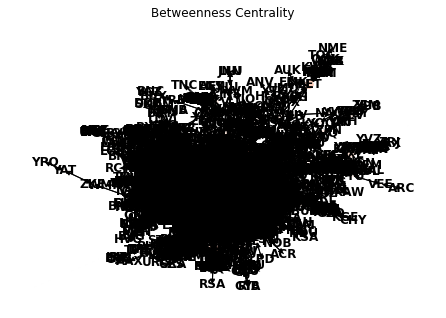

In [73]:
# Plot betweenness centrality
nx.draw(G_sc, node_color=list(betweeness.values()), cmap=plt.cm.Reds,
        node_size=[v * 5000 for v in betweeness.values()],
        with_labels=True, font_weight='bold')
plt.title("Betweenness Centrality")
plt.show()

### Eigenvector Centrality

In [74]:
# #finding the most busiest airports
eigenvector_centrality = nx.eigenvector_centrality(G_sc)

In [75]:
# Sort the nodes by eigenvector centrality
sorted_nodes = sorted(eigenvector_centrality.items(), key=lambda x:x[1], reverse=True)

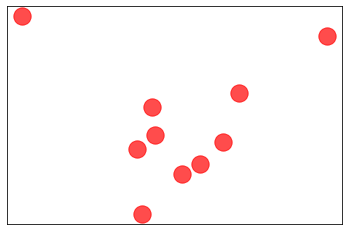

In [76]:
# Plot the top 10 busiest airports based on eigenvector centrality
top_10 = sorted_nodes[:10]

# Extract the node labels
labels = [x[0] for x in top_10]

# Plot the nodes
nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), nodelist=labels, node_color='r', alpha=0.7)

# Add labels to the nodes
labels_dict = {node: node for node in labels}
nx.draw_networkx_labels(G, pos=nx.spring_layout(G), labels={x:x for x in labels})

# Show the plot
plt.show()

In [77]:
Eigenvector=sorted(eigenvector_centrality.items(), key=operator.itemgetter(1),reverse=True)[:5]
l=[]
for i,j in Eigenvector:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City         Country IATA
336   Frankfurt         Germany  FRA
342      Munich         Germany  MUC
502      London  United Kingdom  LHR
574   Amsterdam     Netherlands  AMS
1346      Paris          France  CDG

### Which airports least often act as bridges between other pairs of airports?

In [78]:
close=sorted(betweeness.items(), key=operator.itemgetter(1))[:5]
l=[]
for i,j in close:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City Country IATA
5246   Kirensk  Russia  KCK
5247   Ust-Kut  Russia  UKX
5254  Taganrog  Russia  TGK
6404   Bodaibo  Russia  ODO
6442     Lensk  Russia  ULK

## Articulation point, Bridges


In [79]:
# * A node is considered an articulation point if the removal of that node (along with all its incident edges) increases the number of connected components of a network
arti=list(nx.articulation_points(G_sc.to_undirected()))
len(arti)

320

In [80]:
# A bridge in a graph is an edge whose removal causes the number of connected components of the graph to increase.
nx.has_bridges(G.to_undirected())

True

In [81]:
len(list(nx.bridges(G.to_undirected())))

786

## PageRank
### 5 airports with highest and lowest pagerank?

In [82]:
pr = nx.pagerank(G_sc, alpha=0.85)
pr

{'AER': 0.0003625842656207809,
 'KZN': 0.0004271982725452062,
 'ASF': 0.00017073455436475015,
 'MRV': 0.000329039746132336,
 'CEK': 0.00028966973971590566,
 'OVB': 0.0010973391816792675,
 'DME': 0.004278152209559181,
 'NBC': 0.00016953135132708927,
 'TGK': 6.63458087345287e-05,
 'UUA': 0.00010560784447452424,
 'EGO': 0.00020376030374949335,
 'KGD': 0.00021891017927170117,
 'GYD': 0.0007304711394683356,
 'LED': 0.002287424549594481,
 'SVX': 0.001420356342900888,
 'NJC': 0.0002289467008598995,
 'NUX': 0.00023710085391089657,
 'BTK': 0.00012762869777069698,
 'IKT': 0.0008390532819977664,
 'HTA': 0.00024518549262773844,
 'KCK': 7.250296528847069e-05,
 'ODO': 7.250296528847069e-05,
 'UKX': 7.250296528847069e-05,
 'ULK': 0.00010200462501467277,
 'YKS': 0.0007975788474926554,
 'MJZ': 0.0001910979616172926,
 'AYP': 7.868736129960899e-05,
 'LIM': 0.002119602283450447,
 'CUZ': 0.0002739291730273861,
 'PEM': 0.00012539016821024835,
 'HUU': 7.868736129960899e-05,
 'IQT': 0.00019566942588490122,
 '

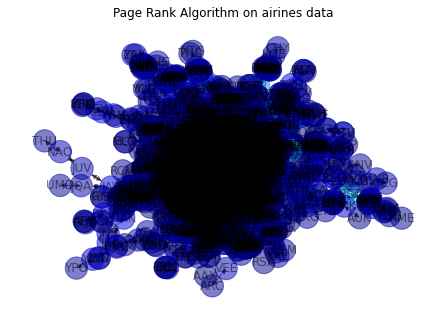

In [83]:
# Get node positions
pos = nx.spring_layout(G_sc)
# Plot the graph
nx.draw(G_sc, pos, with_labels=True, node_color=list(pr.values()),
        cmap=plt.get_cmap('jet'), node_size=500, alpha=0.5)
plt.title("Page Rank Algorithm on airines data")
# Show the plot
plt.show()

In [84]:
# Sort the PageRank scores in descending order and get the top 5
pagerank_top_5 = sorted(pr.items(), key=operator.itemgetter(1), reverse=True)[:5]

# Sort the PageRank scores in ascending order and get the bottom 5
pagerank_bottom_5 = sorted(pr.items(), key=operator.itemgetter(1))[:5]

# Create a dataframe to store the results
results_df = pd.DataFrame(columns=['City', 'Country', 'IATA', 'PageRank Score'])

# Loop through the top 5 airports and add their information to the dataframe
for airport in pagerank_top_5:
    airport_info = airport_df[airport_df['IATA'] == airport[0]]
    results_df = results_df.append({'City': airport_info['City'].values[0], 'Country': airport_info['Country'].values[0], 'IATA': airport[0], 'PageRank Score': airport[1]}, ignore_index=True)

# Loop through the bottom 5 airports and add their information to the dataframe
for airport in pagerank_bottom_5:
    airport_info = airport_df[airport_df['IATA'] == airport[0]]
    results_df = results_df.append({'City': airport_info['City'].values[0], 'Country': airport_info['Country'].values[0], 'IATA': airport[0], 'PageRank Score': airport[1]}, ignore_index=True)

# Display the results
results_df

City                 Country IATA  PageRank Score
0            Atlanta           United States  ATL        0.004937
1           Istanbul                  Turkey  IST        0.004618
2            Chicago           United States  ORD        0.004530
3             Denver           United States  DEN        0.004437
4  Dallas-Fort Worth           United States  DFW        0.004421
5             Ostend                 Belgium  OST        0.000060
6             Lleida                   Spain  ILD        0.000060
7             Mostar  Bosnia and Herzegovina  OMO        0.000060
8               Arad                 Romania  ARW        0.000060
9           Mannheim                 Germany  MHG        0.000060

### Identify hubs and authorities


In [85]:
hits = nx.hits(G_sc)
hits

({'AER': 0.00043645163560318534,
  'KZN': 0.0004286108657031692,
  'ASF': 0.00022975682524070467,
  'MRV': 0.00047602130519619457,
  'CEK': 0.00032557928847081743,
  'OVB': 0.0010957517223877345,
  'DME': 0.00369332645607613,
  'NBC': 0.000307850021809799,
  'TGK': 5.3290341057953756e-05,
  'UUA': 0.00010174701991883415,
  'EGO': 0.0001587188454961759,
  'KGD': 0.0003808924560106212,
  'GYD': 0.0015623294576252997,
  'LED': 0.003165578747819461,
  'SVX': 0.0013514922614125348,
  'NJC': 0.000170791649167328,
  'NUX': 0.00021448323494579306,
  'BTK': 0.00010288175536570794,
  'IKT': 0.000354021083993413,
  'HTA': 0.00015376252674174776,
  'KCK': 5.123111733942533e-06,
  'ODO': 5.123111733942533e-06,
  'UKX': 5.123111733942533e-06,
  'ULK': 9.565929802653575e-06,
  'YKS': 0.0003083395868238262,
  'MJZ': 8.776519720819725e-05,
  'AYP': 1.605174309496243e-05,
  'LIM': 0.001106073102788004,
  'CUZ': 1.7986302024475264e-05,
  'PEM': 1.630061197794377e-05,
  'HUU': 1.605174309496243e-05,
  'IQ

* Hubs

In [86]:
hubs=sorted(hits[0].items(), key=operator.itemgetter(1))[:5]
l=[]
for i,j in hubs:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City        Country IATA
4405          Diu          India  DIU
5388      Central  United States  CEM
5389     Shungnak  United States  SHG
6007  Toksook Bay  United States  OOK
6607     Napakiak  United States  WNA

* Authority

In [87]:
auth=sorted(hits[1].items(), key=operator.itemgetter(1))[:5]
l=[]
for i,j in auth:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City        Country IATA
2860  Porbandar          India  PBD
5106   Mekoryuk  United States  MYU
5418      Kobuk  United States  OBU
5456     Circle  United States  IRC
6608  Napaskiak  United States  PKA

## Degrees

In [88]:
degrees = dict(G_sc.degree())
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G_sc)) for i in degree_values]

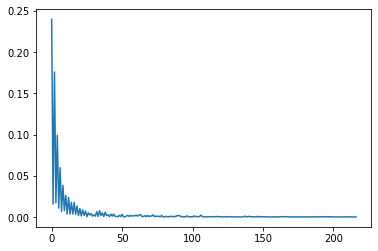

In [89]:
plt.plot(histogram)

### Assorttivity of the Network

In [90]:
r = nx.degree_pearson_correlation_coefficient(G) 
r

-0.01863657832098874

In [91]:
assrt = nx.degree_assortativity_coefficient(G)
assrt 

-0.018636578320986915

### This follows a power law distribution

In [92]:
df = pd.DataFrame(index=G_sc.nodes())
df['clustering'] = pd.Series(nx.clustering(G_sc))
df['in_degree'] = pd.Series(dict(in_deg))

df['out_degree'] = pd.Series(dict(out_deg))
df['degree_centrality'] = pd.Series(nx.degree_centrality(G))
df['closeness'] = pd.Series(closeness)

In [93]:
df['betweeness'] = pd.Series(betweeness)
df['pr'] = pd.Series(pr)
df['hits_hubs'] = pd.Series(hits[0])
df['hits_auth'] = pd.Series(hits[1])

In [94]:
df.head()

clustering  in_degree  out_degree  degree_centrality  closeness  \
AER    0.525952   0.005644    0.005331           0.010733   0.288415   
KZN    0.423810   0.006585    0.006585           0.012879   0.290411   
ASF    0.571429   0.002195    0.002195           0.004293   0.277473   
MRV    0.495833   0.005017    0.005017           0.009813   0.298791   
CEK    0.538462   0.004390    0.004390           0.008586   0.279443   

       betweeness        pr  hits_hubs  hits_auth  
AER  2.733437e-05  0.000363   0.000436   0.000438  
KZN  5.531776e-05  0.000427   0.000429   0.000430  
ASF  8.933468e-07  0.000171   0.000230   0.000229  
MRV  3.233857e-05  0.000329   0.000476   0.000479  
CEK  4.897320e-06  0.000290   0.000326   0.000328

#### Distinctiveness

In [95]:
!pip install distinctiveness

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
from distinctiveness.dc import distinctiveness

In [97]:
DC = distinctiveness(G, alpha = 2, normalize = False, measures = ['D1','D2','D3','D4','D5'])

Missing weights are automatically set equal to 1.


In [98]:
DC = pd.DataFrame(DC).sort_index()

In [99]:
DC

D1_in      D2_in      D3_in     D4_in     D5_in     D1_out  \
AAE  -2.925692  -2.925692  18.221287  0.103121  0.002731  -2.930766   
AAL  -5.407423  -5.407423  33.852536  0.251751  0.017601  -5.359649   
AAN   2.055259   2.055259   6.651667  0.114379  0.006547   2.157564   
AAQ  -2.407774  -2.407774   7.232170  0.021355  0.000159  -2.423424   
AAR  -0.366328  -0.366328  22.312988  0.215981  0.011682  -0.353424   
..         ...        ...        ...       ...       ...        ...   
ZUH  11.540640  11.540640  90.130891  1.430839  0.206181  11.517088   
ZUM   2.943916   2.943916   7.095996  0.190909  0.018264   3.035431   
ZVK   2.515644   2.515644   9.693879  0.267088  0.043529   2.515644   
ZYI  -3.464982  -3.464982  34.823756  0.184214  0.003075  -3.461859   
ZYL  -1.872339  -1.872339  10.311907  0.052993  0.001113   0.450393   

        D2_out     D3_out    D4_out    D5_out  
AAE  -2.930766  18.218750  0.103033  0.002729  
AAL  -5.359649  33.876423  0.253325  0.017688  
AAN   2.157564   6.702820  0.121324  0.007366  
AAQ  -2.423424   7.224345  0.021192  0.000156  
AAR  -0.353424  22.319440  0.216093  0.011684  
..         ...        ...       ...       ...  
ZUH  11.517088  90.119115  1.429890  0.206084  
ZUM   3.035431   7.141754  0.202020  0.020610  
ZVK   2.515644   9.693879  0.267088  0.043529  
ZYI  -3.461859  34.825318  0.184526  0.003100  
ZYL   0.450393   3.037216  0.029412  0.000865  

[3262 rows x 10 columns]

In [100]:
import networkx.algorithms.community as nx_comm

In [101]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
from networkx.algorithms import community
import community as community_louvain
try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either "
                          "PyGraphviz or pydot")
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

In [103]:
#G1 =G.to_undirected(reciprocal=False, as_view=False)

In [104]:
from networkx.algorithms.community.centrality import girvan_newman

[['KLO', 'GGW', 'SBW', 'YCS', 'BAY', 'ANR', 'TAH', 'XMS', 'BHX', 'SHH', 'LSY', 'PXU', 'MCP', 'PAH', 'KBL', 'TUL', 'CDC', 'JSY', 'RCM', 'HTA', 'SJJ', 'MDU', 'REG', 'VKO', 'PRI', 'PEE', 'STC', 'HAV', 'DLE', 'SVQ', 'NOV', 'TCB', 'DEN', 'SCQ', 'DLC', 'IIL', 'YXU', 'DCA', 'WEF', 'BFS', 'LZO', 'MVT', 'YXC', 'SNW', 'SRA', 'MJM', 'PVD', 'NJF', 'BZE', 'MAF', 'SJE', 'AKL', 'IGA', 'GWT', 'LKL', 'PUQ', 'IEV', 'SPR', 'ZYL', 'GEG', 'MHK', 'ADL', 'SGD', 'PPP', 'TRO', 'MJZ', 'BTU', 'PLQ', 'YUS', 'MXX', 'ITH', 'RAB', 'KLR', 'LTX', 'CJJ', 'NDG', 'CNX', 'BHD', 'BHU', 'TRF', 'YDQ', 'PIP', 'SIN', 'LLW', 'PPB', 'NAV', 'SZA', 'LLA', 'GGG', 'RGS', 'PXM', 'AQJ', 'EBL', 'PDP', 'VAW', 'VOZ', 'STD', 'BWT', 'SUR', 'JHM', 'CRP', 'HEK', 'AOI', 'PXO', 'CJM', 'KHN', 'ZBF', 'HIR', 'BFV', 'CAK', 'LIS', 'TOL', 'SEZ', 'TTN', 'LKB', 'TLE', 'TAP', 'PTP', 'ENE', 'WMI', 'STI', 'TSA', 'OKL', 'RDC', 'ULN', 'EDI', 'UBP', 'SIT', 'SXO', 'BLE', 'LOD', 'PBG', 'JUB', 'MLO', 'MMB', 'SDD', 'SZZ', 'CWL', 'BLZ', 'LHW', 'ATQ', 'SUX', 'TMS

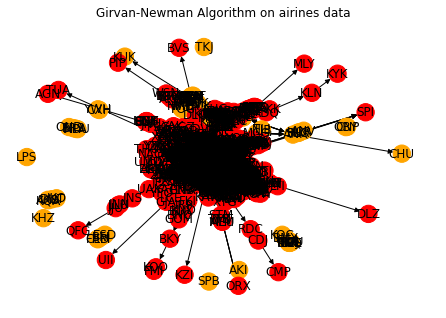

In [105]:
communities = girvan_newman(G)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append("red")
    else:
        color_map.append("orange")
nx.draw(G, node_color=color_map, with_labels=True)
plt.title("Girvan-Newman Algorithm on airines data")
plt.show()

### For Undirected Network

In [106]:
G_draw_undi = nx.from_pandas_edgelist(G_df.head(1000), 'Source airport', 'Destination airport',create_using=nx.Graph())

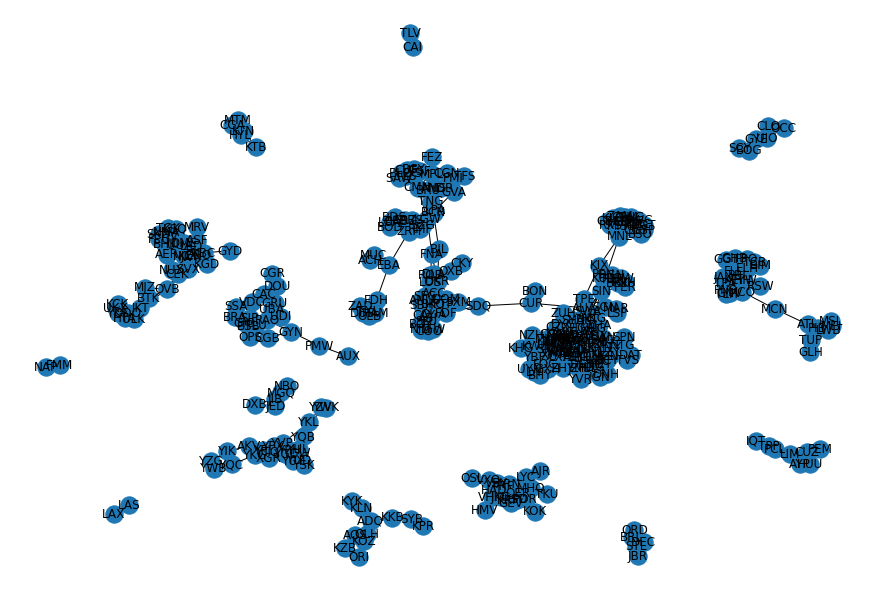

In [107]:
plt.figure(figsize=(12,8))
nx.draw(G_draw_undi,pos=nx.spring_layout(G_draw_undi),with_labels=True)

In [108]:
G_undi = nx.from_pandas_edgelist(G_df, 'Source airport', 'Destination airport',create_using=nx.Graph())

In [109]:
print(nx.info(G_undi))

Name: 
Type: Graph
Number of nodes: 3425
Number of edges: 19257
Average degree:  11.2450


In [110]:
nx.is_connected(G_undi)

False

In [ ]:
G_undi.nodes

In [ ]:
#G_undi.edges

#### Degree and Clustering Analysis of Unidrected Graph


In [111]:
degree_undi = G_undi.degree()

In [113]:
#degree_undi

In [112]:
degrees_dict = {node:val for (node, val) in G_undi.degree()}

In [114]:
df = pd.DataFrame()

In [115]:
df['val'] = degrees_dict.values()
df['key'] = degrees_dict.keys()

In [ ]:
#df

In [116]:
Cluster_undi = nx.clustering(G_undi)

In [117]:
df['cluster'] = Cluster_undi.values()

In [118]:
df

val  key   cluster
0      18  AER  0.516340
1      21  KZN  0.428571
2       7  ASF  0.571429
3      16  MRV  0.500000
4      14  CEK  0.549451
...   ...  ...       ...
3420    2  WIN  0.000000
3421    1  LSY  0.000000
3422    3  MIM  0.666667
3423    2  MYA  1.000000
3424    1  OAG  0.000000

[3425 rows x 3 columns]

In [119]:
nx.average_clustering(G_undi)

0.4870933566129556

In [120]:
# Is there any Direct flight from one airport to other airport
"RCM" in list(nx.neighbors(G_undi, "WIN"))

False

In [121]:
#'TZL', 'MMX'
print("TZL" in list(nx.neighbors(G_undi, "MMX")))
#print(nx.shortest_path(G, "TZL", "MMX"))
#print(nx.shortest_path_length(G, "TZL", "MMX"))

True


In [122]:
# Find the shortest way to one airport to other airport
nx.shortest_path(G_undi, "RCM", "WIN")

['RCM', 'JCK', 'ISA', 'TSV', 'WIN']

In [123]:
# Find the shortest way to one airport to other airport
nx.shortest_path_length(G_undi, "RCM", "WIN")

4